#Format Data for Experiment in ABM environment

In [1]:
#Import Packages
#Needed for moving to output
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as pl

#Analysis tumor-tcell modules needed
from tumor_tcell.library.population_plots import death_group_plot
from tumor_tcell.library.population_plots import population_group_plot

In [2]:
#Input variables
experiment_dir = ['25% PD1+/','75% PD1+/','No T cells/']
experiment_name = 'PD1_25vs75vs0_in'

In [3]:
#Save for correcting later
conditions_list = [i.split("/", 1)[0] for i in experiment_dir]
exp_dict = {i: conditions_list[i] for i in range(0, len(conditions_list), 1)}
cell_dict = {0:'Tumor', 1:'T Cell'}
cell_states_tcell = ['PD1n','PD1p']
cell_states_tumor = ['PDL1n','PDL1p']
cell_states = [cell_states_tumor,cell_states_tcell]

In [4]:
#Get csv saved in experiment id library
analysis_dir = '/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/'
save_dir = analysis_dir+'Multiple_analysis/'

#Make new output analysis folder with Experiment Name
analysis_out_dir = save_dir + experiment_name 
os.makedirs(analysis_out_dir, exist_ok=True)

#make into a list for looping
analysis_dir_list=[]
for exp in experiment_dir:
    add_dir = analysis_dir+exp
    analysis_dir_list.append(add_dir)

#Create a list of dataframes for concatenation
plot_data_list = []  
death_data_list = []  

for exp_dir in analysis_dir_list:
    os.chdir(exp_dir)
    experiment_list = next(os.walk('.'))[1]
    
    plot_list = []
    death_list = []
    df_tumor_death_list = []
    df_tcell_death_list = []
    tumor_plot_list = []
    tcell_plot_list = []
    
    for experiment in experiment_list:
        experiment_directory = exp_dir+experiment
        os.chdir(experiment_directory)
        
        file_list = os.listdir()
        if 'tcell_plot.csv' in file_list:
            df_tumor_death = pd.read_csv('tumor_death.csv')
            df_tumor_death_list.append(df_tumor_death)

            tumor_plot = pd.read_csv('tumor_plot.csv')
            tumor_plot_list.append(tumor_plot)

            df_tcell_death = pd.read_csv('tcell_death.csv')
            df_tcell_death_list.append(df_tcell_death)

            tcell_plot = pd.read_csv('tcell_plot.csv')
            tcell_plot_list.append(tcell_plot)
            
        else:
            df_tumor_death = pd.read_csv('tumor_death.csv')
            df_tumor_death_list.append(df_tumor_death)

            tumor_plot = pd.read_csv('tumor_plot.csv')
            tumor_plot_list.append(tumor_plot)
    
    plot_list.extend([tumor_plot_list,tcell_plot_list])
    death_list.extend([df_tumor_death_list,df_tcell_death_list])
    plot_data_list.append(plot_list)
    death_data_list.append(death_list)

plot_data_list[0]    

[[        Unnamed: 0       time               cell cell_state      IFNg  \
  0                0   0.000000            tumor_0      PDL1p  0.000000   
  1                1   0.000000            tumor_1      PDL1n  0.000000   
  2                2   0.000000            tumor_2      PDL1n  0.000000   
  3                3   0.000000            tumor_3      PDL1p  0.000000   
  4                4   0.000000            tumor_4      PDL1n  0.000000   
  ...            ...        ...                ...        ...       ...   
  880885      880885  73.333333    tumor_1026BBABB      PDL1n  0.000332   
  880886      880886  73.333333   tumor_35AABBAAAA      PDL1n  0.000102   
  880887      880887  73.333333   tumor_35AABBAAAB      PDL1n  0.000102   
  880888      880888  73.333333  tumor_261AABBBAAA      PDL1n  0.000297   
  880889      880889  73.333333  tumor_261AABBBAAB      PDL1n  0.000297   
  
          cytotoxic_packets           X            Y  \
  0                     0.0  917.412815  

In [5]:
cell_plot_list = []
for exp in range(len(plot_data_list)):
    df_list_plot = []
    exp_df = plot_data_list[exp]
    for cell in range(len(exp_df)):
        cell_state_list_1 = []
        cell_state_list_2 = []
        total_list = []
        cell_list = []
        cell_df = exp_df[cell]
        
        if len(cell_df)==0:
            continue
            
        else:
        
            for i in range(len(cell_df)):
                #get unique cells
                total_cell = cell_df[i].groupby(['time','experiment_id'])['cell'].nunique().reset_index()
                total_list.append(total_cell)

                cell_state_df = cell_df[i].groupby(['time', 'cell_state','experiment_id'])['cell'].nunique().reset_index()
                state_1 = cell_state_df.loc[cell_state_df['cell_state'] == cell_states[cell][0]]
                cell_state_list_1.append(state_1)

                state_2 = cell_state_df.loc[cell_state_df['cell_state'] == cell_states[cell][1]]
                cell_state_list_2.append(state_2)

            df_total = pd.concat(total_list)
            df_state_1 = pd.concat(cell_state_list_1)
            df_state_2 = pd.concat(cell_state_list_2)
            
        df_total_ave = df_total.groupby(['time']).agg({'cell': ['mean', 'sem']})
        df_total_ave.columns = df_total_ave.columns.droplevel(0)
        df_total_ave = df_total_ave.rename_axis(None, axis=1)
        df_total_ave.reset_index(inplace=True)
        
        
        df_state_1_ave = df_state_1.groupby(['time','cell_state']).agg({'cell': ['mean', 'sem']})
        df_state_1_ave.columns = df_state_1_ave.columns.droplevel(0)
        df_state_1_ave = df_state_1_ave.rename_axis(None, axis=1)
        df_state_1_ave.reset_index(inplace=True)
    
        df_state_2_ave = df_state_2.groupby(['time','cell_state']).agg({'cell': ['mean', 'sem']})
        df_state_2_ave.columns = df_state_2_ave.columns.droplevel(0)
        df_state_2_ave = df_state_2_ave.rename_axis(None, axis=1)
        df_state_2_ave.reset_index(inplace=True)
        
        cell_state_all = pd.concat([df_state_1_ave, df_state_2_ave])
        cell_list.append(df_total_ave)
        cell_list.append(cell_state_all)
        df_list_plot.append(cell_list)
    
    cell_plot_list.append(df_list_plot)
        
cell_plot_list

[[[          time     mean         sem
   0     0.000000  1200.00    0.000000
   1     0.166667  1203.75    0.750000
   2     0.333333  1206.50    1.554563
   3     0.500000  1208.50    0.500000
   4     0.666667  1211.25    0.478714
   ..         ...      ...         ...
   436  72.666667  4169.75  391.150733
   437  72.833333  4184.50  397.152678
   438  73.000000  4199.75  400.798032
   439  73.166667  4218.25  404.146091
   440  73.333333  4238.00  405.970648
   
   [441 rows x 3 columns],
             time cell_state    mean        sem
   0     0.000000      PDL1n  611.50  11.608187
   1     0.166667      PDL1n  615.75  11.799541
   2     0.333333      PDL1n  619.25  12.147531
   3     0.500000      PDL1n  621.25  12.126933
   4     0.666667      PDL1n  624.00  11.618950
   ..         ...        ...     ...        ...
   436  72.666667      PDL1p  587.50  67.843570
   437  72.833333      PDL1p  585.25  67.391116
   438  73.000000      PDL1p  584.00  67.383232
   439  73.166667    

In [10]:
df_plot.cell_state.unique()

array(['PDL1n', 'PDL1p'], dtype=object)

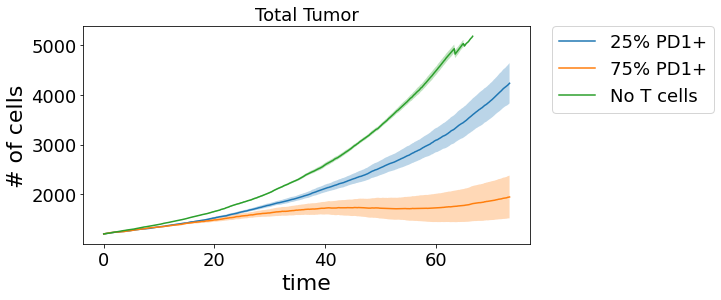

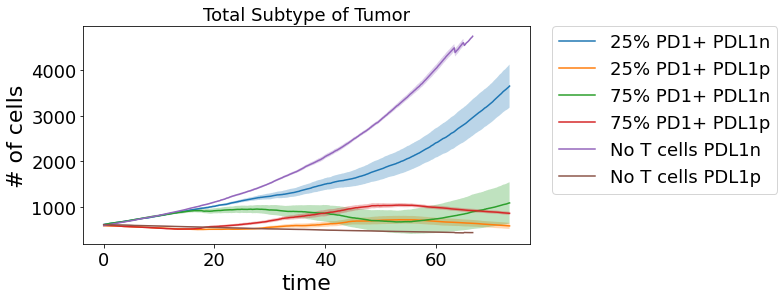

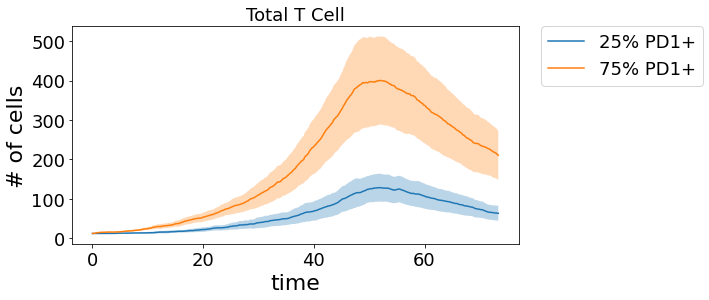

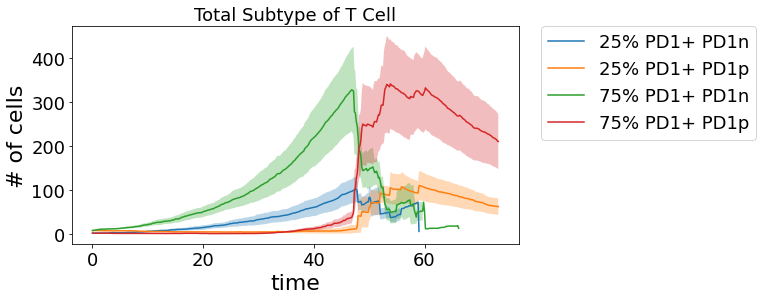

In [15]:
for cell in range(len(cell_plot_list[0])):
    
    SMALL_SIZE = 18
    MEDIUM_SIZE = 22
    BIGGER_SIZE = 24

    pl.rc('font', size=SMALL_SIZE)  # controls default text sizes
    pl.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
    pl.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
    pl.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    pl.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    pl.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
    pl.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # Create plot
    pl.figure(figsize=(8, 4))

    for exp in range(len(cell_plot_list)): 
        
        if len(cell_plot_list[exp])==1 & cell>0:
            continue
        else:
            df_plot = cell_plot_list[exp][cell][0]

            # create vectors to use for SEM plotting
            M_new_vec = np.array(df_plot['mean'])
            Sigma_new_vec = np.array(df_plot['sem'])
            lower_bound = M_new_vec - Sigma_new_vec
            upper_bound = M_new_vec + Sigma_new_vec

            # Create plot
            ttl_1 = sns.lineplot(data=df_plot, x="time", y='mean', label=exp_dict[exp])
            pl.title("Total " + str(cell_dict[cell]))
            pl.ylabel('# of cells')
            pl.fill_between(df_plot['time'], lower_bound, upper_bound, alpha=.3)
            pl.legend(title="Experiment")
            pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    pl.savefig(analysis_out_dir + '/' + cell_dict[cell] + '_cell_total.png', transparent=True, format='png',
               bbox_inches='tight', dpi=300)
        
    # Create plot
    pl.figure(figsize=(8, 4))

    for exp in range(len(cell_plot_list)):    
        if len(cell_plot_list[exp])==1 & cell>0:
            continue
        else:
            df_plot = cell_plot_list[exp][cell][1]

            for state in df_plot.cell_state.unique():
                # create vectors to use for SEM plotting
                df_state = df_plot[df_plot.cell_state==state]
                M_new_vec = np.array(df_state['mean'])
                Sigma_new_vec = np.array(df_state['sem'])
                lower_bound = M_new_vec - Sigma_new_vec
                upper_bound = M_new_vec + Sigma_new_vec

                # Create plot
                ttl_2 = sns.lineplot(data=df_state, x="time", y='mean',label=exp_dict[exp]+' '+state)
                pl.title("Total Subtype of " + cell_dict[cell])
                pl.ylabel('# of cells')
                pl.fill_between(df_state['time'], lower_bound, upper_bound, alpha=.3)
                pl.legend(title="Experiment")
                pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    pl.savefig(analysis_out_dir + '/' + cell_dict[cell] + '_cell_subtypes.png', transparent=True, format='png',
               bbox_inches='tight', dpi=300)

In [7]:
death_plot_list = []
for exp in range(len(death_data_list)):
    death_list_plot = []
    exp_df = death_data_list[exp]
    
    for cell in range(len(exp_df)):
        death_cell_list = []
        death_plot_l = []
        other_death_plot_l =[]
        cell_df = exp_df[cell]
        
        if len(cell_df)==0:
            continue
            
        else:
        
            for i in range(0,len(cell_df)):    
                cell_df[i]['time_s'] = cell_df[i].time*3600
                cell_df[i].time_s = cell_df[i].time_s.round(-1).astype(int)
                death_types_list = list(cell_df[i]['death'].unique())

                dict_death = {}
                for death_type in death_types_list:
                    dict_death[death_type] = 'sum'
                dict_death['experiment_id'] = 'first'
                death_agg = cell_df[i].groupby('time_s').agg(dict_death)
                death_agg_time = death_agg.reindex(np.arange(0, cell_df[i].time_s.max()+60,60),fill_value=0)
                death_agg_time.index = pd.to_timedelta(death_agg_time.index, unit='s')
                df_hour = death_agg_time.resample('h').sum()
                for death_type in death_types_list:
                    df_hour['total_' + str(death_type)] = df_hour[death_type].cumsum()
                total_col_t = [col for col in df_hour.columns if 'total' in col]
                df_hour['total_death'] = df_hour[total_col_t].sum(axis=1)
                df_hour['time'] = (df_hour.index.days*24+df_hour.index.seconds/3600)

                total_col = [col for col in df_hour.columns if 'total' in col]
                death_plot = pd.melt(df_hour, id_vars=[ 'time',], value_vars=total_col)
                death_plot.rename(columns={'variable': 'death type', 'value': 'death count'}, inplace=True)
                death_plot['experiment_id'] = i

                total_death_plot = death_plot.loc[death_plot['death type'] == 'total_death']
                other_death_plot = death_plot.loc[~(death_plot['death type'] == 'total_death')]

                death_plot_l.append(total_death_plot)
                other_death_plot_l.append(other_death_plot)

        # Concatenate all
        death_plots = pd.concat(death_plot_l)
        other_death_plots = pd.concat(other_death_plot_l)

        total_death_plot_ave = death_plots.groupby('time').agg({'death count': ['mean', 'sem']})
        total_death_plot_ave.columns = total_death_plot_ave.columns.droplevel(0)
        total_death_plot_ave = total_death_plot_ave.rename_axis(None, axis=1)
        total_death_plot_ave.reset_index(inplace=True)
        
        other_death_plot_ave = other_death_plots.groupby(['time','death type']).agg({'death count': ['mean', 'sem']})
        other_death_plot_ave.columns = other_death_plot_ave.columns.droplevel(0)
        other_death_plot_ave = other_death_plot_ave.rename_axis(None, axis=1)
        other_death_plot_ave.reset_index(inplace=True)

        death_cell_list.append(total_death_plot_ave)
        death_cell_list.append(other_death_plot_ave)
        death_list_plot.append(death_cell_list)
    
    death_plot_list.append(death_list_plot)
        
death_plot_list

[[[    time     mean        sem
   0    0.0     5.50   1.322876
   1    1.0    14.25   2.015564
   2    2.0    27.75   4.607512
   3    3.0    38.50   2.958040
   4    4.0    51.25   3.772157
   ..   ...      ...        ...
   69  69.0  1341.75  31.810310
   70  70.0  1366.25  32.553482
   71  71.0  1393.75  33.796881
   72  72.0  1430.50  33.728079
   73  73.0  1440.25  33.628795
   
   [74 rows x 3 columns],
        time         death type    mean        sem
   0     0.0  total_Tcell_death    0.00   0.000000
   1     0.0    total_apoptosis    5.50   1.322876
   2     1.0  total_Tcell_death    0.50   0.288675
   3     1.0    total_apoptosis   13.75   1.796988
   4     2.0  total_Tcell_death    6.00   1.224745
   ..    ...                ...     ...        ...
   143  71.0    total_apoptosis  873.50  33.149912
   144  72.0  total_Tcell_death  527.75  42.983282
   145  72.0    total_apoptosis  902.75  33.823993
   146  73.0  total_Tcell_death  530.25  43.715701
   147  73.0    total_apo

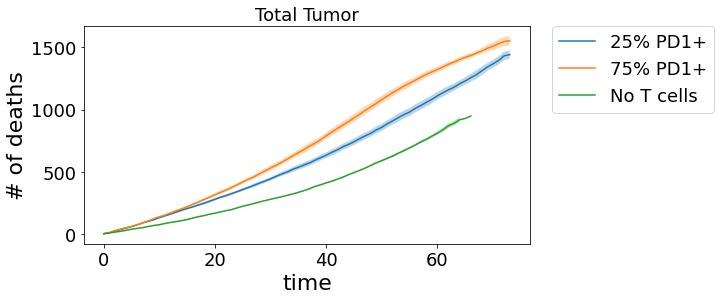

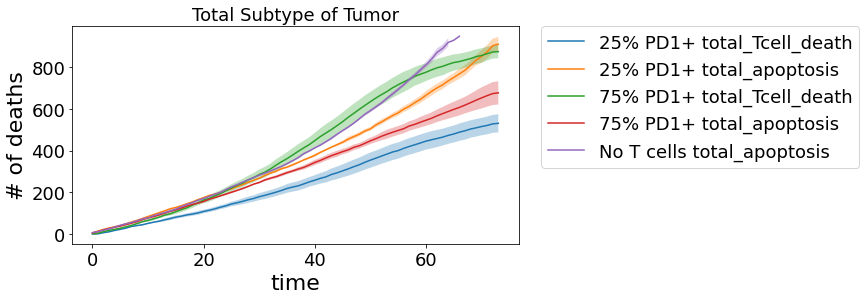

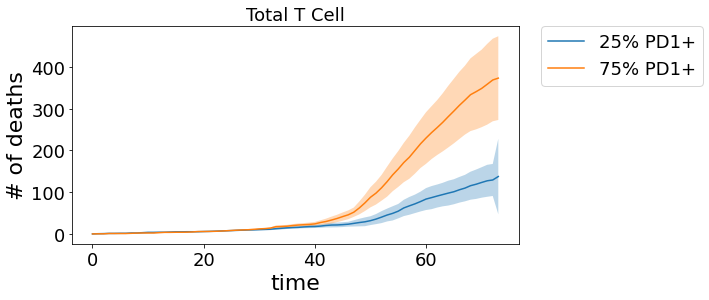

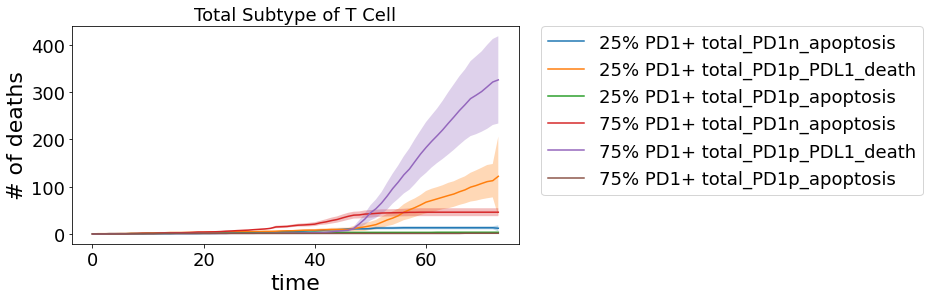

In [8]:
for cell in range(len(death_plot_list[0])):

    SMALL_SIZE = 18
    MEDIUM_SIZE = 22
    BIGGER_SIZE = 24

    pl.rc('font', size=SMALL_SIZE)  # controls default text sizes
    pl.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
    pl.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
    pl.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    pl.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    pl.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
    pl.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # Create plot
    pl.figure(figsize=(8, 4))

    for exp in range(len(death_plot_list)):    
        if len(death_plot_list[exp])==1 & cell>0:
            continue
        else:
        
            df_plot = death_plot_list[exp][cell][0]

            # create vectors to use for SEM plotting
            M_new_vec = np.array(df_plot['mean'])
            Sigma_new_vec = np.array(df_plot['sem'])
            lower_bound = M_new_vec - Sigma_new_vec
            upper_bound = M_new_vec + Sigma_new_vec

            # Create plot
            ttl_1 = sns.lineplot(data=df_plot, x="time", y='mean', label=exp_dict[exp])
            pl.title("Total " + cell_dict[cell])
            pl.ylabel('# of deaths')
            pl.fill_between(df_plot['time'], lower_bound, upper_bound, alpha=.3)
            pl.legend(title="Experiment")
            pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    pl.savefig(analysis_out_dir + '/' + cell_dict[cell]+'_death_total.png', transparent=True, format='png',
               bbox_inches='tight', dpi=300)

    # Create plot
    pl.figure(figsize=(8, 4))

    for exp in range(len(death_plot_list)):    
        if len(death_plot_list[exp])==1 & cell>0:
            continue
        else:
            df_plot = death_plot_list[exp][cell][1]

            for death_type in df_plot['death type'].unique():
                # create vectors to use for SEM plotting
                df_state = df_plot[df_plot['death type']==death_type]
                M_new_vec = np.array(df_state['mean'])
                Sigma_new_vec = np.array(df_state['sem'])
                lower_bound = M_new_vec - Sigma_new_vec
                upper_bound = M_new_vec + Sigma_new_vec

                # Create plot
                ttl_2 = sns.lineplot(data=df_state, x="time", y='mean',label=exp_dict[exp]+' '+death_type)
                pl.title("Total Subtype of " + cell_dict[cell])
                pl.ylabel('# of deaths')
                pl.fill_between(df_state['time'], lower_bound, upper_bound, alpha=.3)
                pl.legend(title="Experiment")
                pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    pl.savefig(analysis_out_dir + '/' + cell_dict[cell] + '_death_subtype.png', transparent=True, format='png',
               bbox_inches='tight', dpi=300)       